# John Oppong Acquah

## Mall Customers Clustering Analysis

## Introduction

#### Customer Segmentation
Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. Segmentation allows marketers to better tailor their marketing efforts to various audience subsets. Those efforts can relate to both communications and product development.

Customer segmentation requires the gathering of specific specific information – data – about customers and analyze it to identify patterns that can be used to create segments.



### Problem Statement
A mall wants to improve its products and improve sales.

To achieve this they need to segment their customers to target market purposes and promotions



### Objectives

The objectives of the project are:
1. To explore the data

2. To segment the customers of the mall based on certain attributes. The attributes under consideration are Annual Income, thus how much the make in a year and Spending Score, how much they spend on each visit to the mall.

3. Analyze each segment with respect to the attributes under consideration (Annual Income, Spending Score)


# Steps

#### 1. Importing libraries
This step involves the importation of tools and libraries to aid the work.


####  2. Data Gathering
The dataset can be obtained from kaggle.


#### 3. Exploratory Data Analysis
Data will be explored using dexcriptive statistics and visualisations. 
Data will be cleaned to make sure there are no errors or missing values.


#### 4. Data Preprocessing for modeling
At this point, the metrics are centered and tranformed to enhace KMeans clustering.

#### 5. Creating Clusters with K-Means Algorithm
This stage involves using the unsupervised machine learning learning algorithm(k-Means) to create clusters.

#### 6. Analysing the clusters
This clusters involves identifying the common characteristics within a cluster based on the attributes (Annual Income, Spending score)



## Definition of Attributes

#### Annual Income
Annual income is the amount of money you receive during the year into your bank account, before any deductions.


#### Spending Score
It is the score(out of 100) given to a customer by the mall authorities, based on the money spent and the behavior of the customer.





# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")


In [2]:
os.getcwd

<function nt.getcwd()>

# 2. Gathering data

In [3]:
mc = pd.read_csv('Mall_Customers.csv')

# 3. Exploratory Data Analysis

In [4]:
#displaying the first 5 rows of the dataset
mc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# is there any null values in the dataset, if so sum them up
mc.isnull().any().sum()

0

In [6]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
mc.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
mc.describe(include = "object")

,Gender
count,200
unique,2
top,Female
freq,112


In [9]:
mc.drop("CustomerID", axis = 1, inplace =True)

In [10]:
mc.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
# Function to create a countplot of all the categorical features
def count_plot(mc, feature_name):
    
    """
    Displays a countplot of categorical variables in the data
    
    Input: Pandas DataFrame and Column name
    Output: Countplot of the various categories
    
    """
    
    
    return mc[feature_name].value_counts(normalize = True).plot.bar(color = 'blue', alpha = 0.5,
                                                                   title = "FEATURE PROPORTIONS",
                                                                   legend = 'best')
plt.show()

<AxesSubplot:title={'center':'FEATURE PROPORTIONS'}>

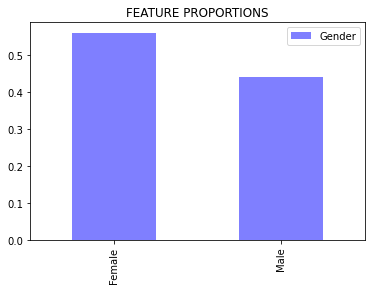

In [12]:
count_plot(mc,'Gender')

it can be infered from the data that there are more female customers than males.

In [13]:
mc['Gender'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

56% of the entire population in the dataset are females whiles 46% are males.

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

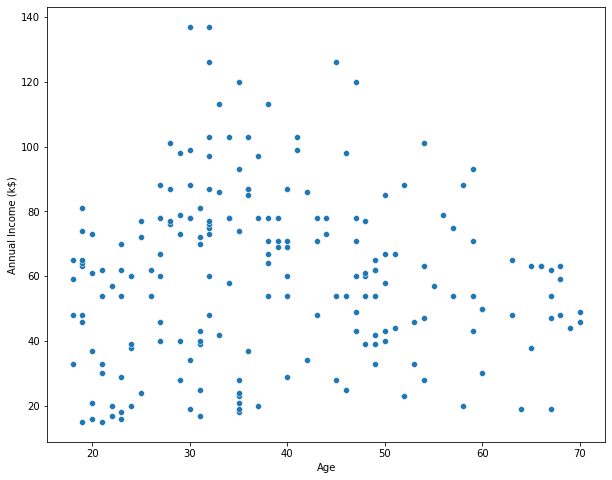

In [14]:
plt.figure(figsize = (10,8))
sns.scatterplot(mc['Age'],mc['Annual Income (k$)'], data = mc)

People between the ages of 30 and 50 earn the most.

#### Lets check out the gender, their ages, and spending score

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

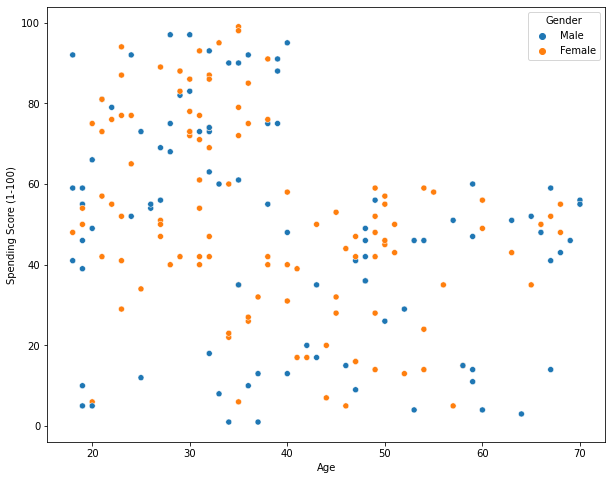

In [15]:
plt.figure(figsize = (10,8))
sns.scatterplot(mc['Age'],mc['Spending Score (1-100)'], hue = mc.Gender,data = mc)

Customers between the ages of 20 to 40 have higher spending scores. Gender does not matter here because males and females of the same ages have similar spending scores in general

Text(0.5, 1.0, 'Gender vrs Spending Score')

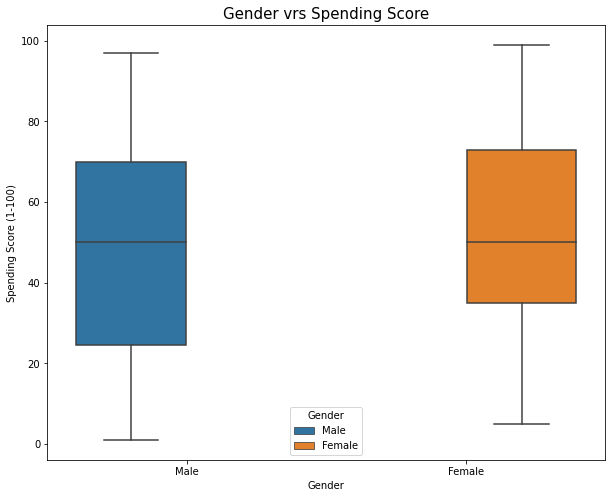

In [16]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Gender',y='Spending Score (1-100)',data=mc,hue = mc.Gender, orient = 'v')
plt.title('Gender vrs Spending Score',fontsize = 15)

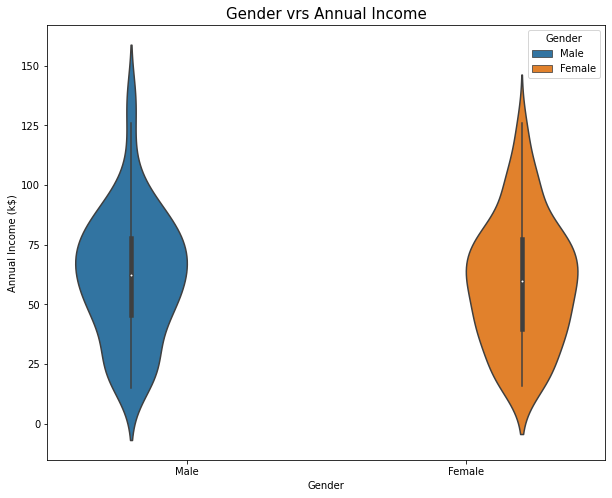

In [17]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='Gender',y='Annual Income (k$)',data=mc,hue = mc.Gender, orient = 'v')
plt.title('Gender vrs Annual Income',fontsize = 15)
plt.show()

Looking at the above visuals, it can be seen that males have a slightly higher annual income than females.

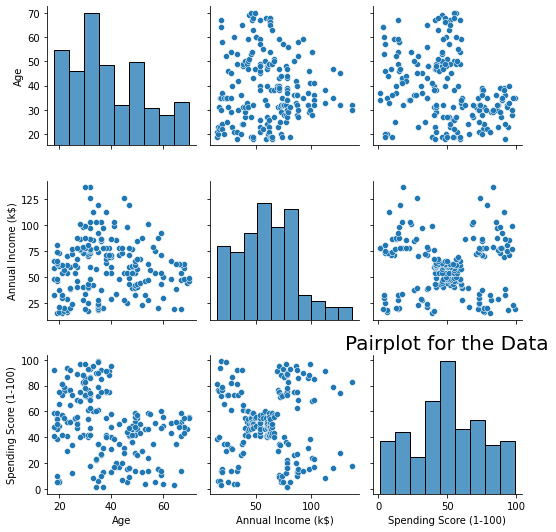

In [18]:
sns.pairplot(mc)
plt.title('Pairplot for the Data', fontsize = 20)
plt.tight_layout()
plt.show()

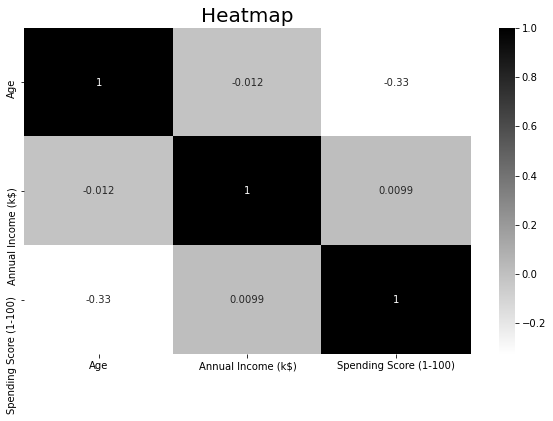

In [19]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.heatmap(mc.corr(), cmap = 'gist_yarg', annot = True)
plt.title('Heatmap', fontsize = 20)
plt.show()

## Getting summary statistics and distribution of numerical data

In [20]:
def explore_numvar(mc,feature_name):
    """
    retrieves the summary of numerical variables from a pandas DataFrame
    
    INPUT: DataFrame and column name
    OUTPUT: length,
             minimum,
             maximum,
             median,
             mean,
             standard deviation,
             number of missing values,
             boxplot,
             and a histogram
        
    """

    print('Summary Statistics \n')
    print(mc[feature_name].apply([len,min,max,np.median,np.mean,np.std]))
    print("=================================================")
    print("Missing values: {}".format(mc[feature_name].isnull().sum()))
    print("=================================================\n")
    plt.figure(figsize = (8,6))
    # plotting a boxplot
    meanpointprops = dict(marker = 'o',markeredgecolor = "blue",
                          markerfacecolor='firebrick')
    medianprops = dict(linestyle = "-.", linewidth =3, color = "gold")
    plt.subplot(1,2,1)
    plt.boxplot(mc[feature_name],vert = True,patch_artist = True, notch = True,
               showmeans = True,medianprops = medianprops,meanprops = meanpointprops)
    plt.xlabel(mc[feature_name].name)
    plt.title("Boxplot")
    
    # plotting histogram
    plt.subplot(1,2,2)
    plt.hist(mc[feature_name])
    plt.title("Histogram")
    plt.tight_layout()
    plt.show()

Summary Statistics 

len       200.000000
min        18.000000
max        70.000000
median     36.000000
mean       38.850000
std        13.969007
Name: Age, dtype: float64
Missing values: 0



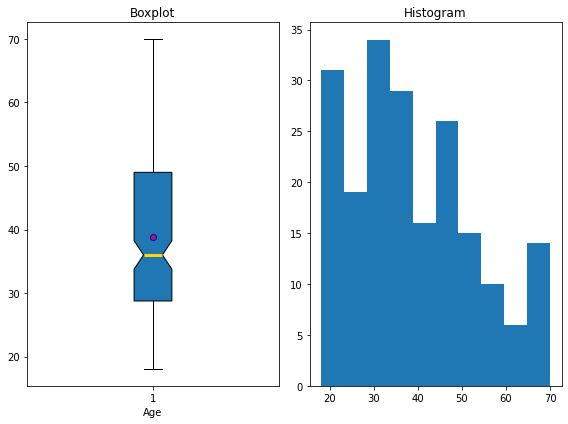

In [21]:
explore_numvar(mc,"Age")

Summary Statistics 

len       200.000000
min         1.000000
max        99.000000
median     50.000000
mean       50.200000
std        25.823522
Name: Spending Score (1-100), dtype: float64
Missing values: 0



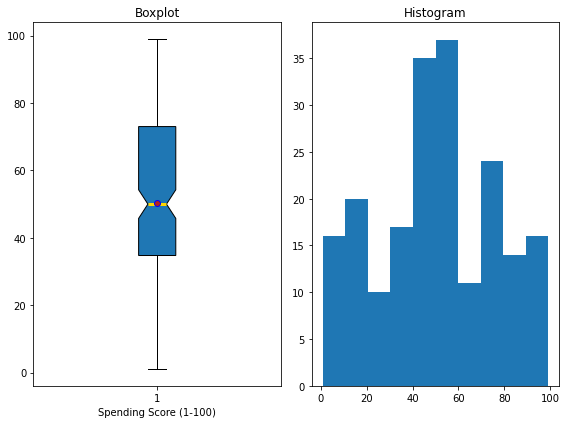

In [22]:
explore_numvar(mc,'Spending Score (1-100)')

Summary Statistics 

len       200.000000
min        15.000000
max       137.000000
median     61.500000
mean       60.560000
std        26.264721
Name: Annual Income (k$), dtype: float64
Missing values: 0



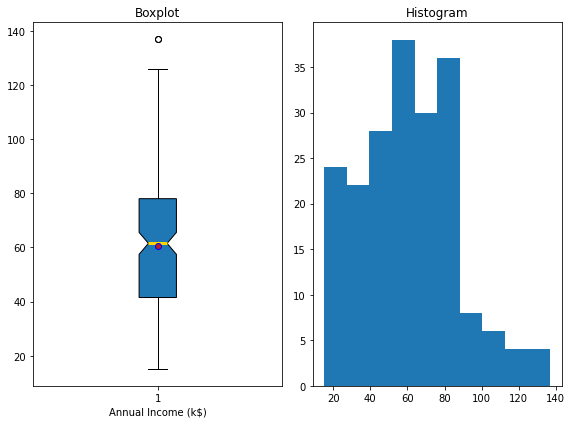

In [23]:
explore_numvar(mc,'Annual Income (k$)')

# 4. Data Preprocessing


### Encoding categorical variables

the gender column in the data is a categorical. categories in the feature will be encoded. thus replaced with numbers (0,1). '0' for male and '1' for female.


Scaling will not be possible if this is not done

In [24]:
mc['Gender'].replace(['Male','Female'],[0,1], inplace = True)

In [25]:
mc.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


### Centering and scaling data
Kmeasn algorithm will perform better when the data is centered and scaled.


Standard scaler from sklearn will be used 

In [26]:
# Scaling the data using standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(mc[['Annual Income (k$)']])
mc['Annual Income (k$)'] = scaler.transform(mc[['Annual Income (k$)']])
mc.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,-1.738999,39
1,0,21,-1.738999,81
2,1,20,-1.700830,6
3,1,23,-1.700830,77
4,1,31,-1.662660,40


In [27]:
scaler.fit(mc[['Spending Score (1-100)']])
mc['Spending Score (1-100)'] = scaler.transform(mc[['Spending Score (1-100)']])
mc.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,-1.738999,-0.434801
1,0,21,-1.738999,1.195704
2,1,20,-1.700830,-1.715913
3,1,23,-1.700830,1.040418
4,1,31,-1.662660,-0.395980


In [28]:
scaler.fit(mc[['Age']])
mc['Age'] = scaler.transform(mc[['Age']])
mc.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,-1.424569,-1.738999,-0.434801
1,0,-1.281035,-1.738999,1.195704
2,1,-1.352802,-1.700830,-1.715913
3,1,-1.137502,-1.700830,1.040418
4,1,-0.563369,-1.662660,-0.395980


# 5.Creating clusters with KMeans Algorithm

### Choosing the number of clusters using the elbow method

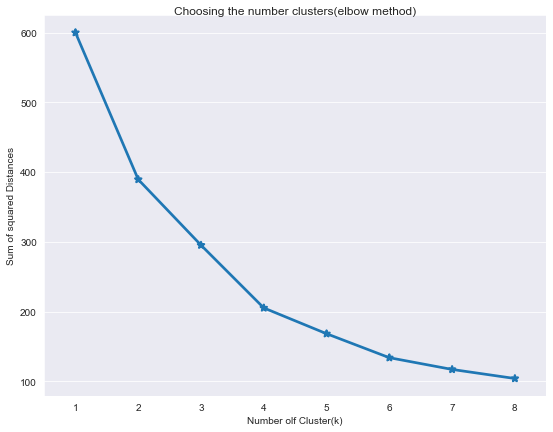

In [29]:
from sklearn.cluster import KMeans
sns.set_style('darkgrid')
sum_of_sq_dist = {}
for k in range(1,9):
    km = KMeans(n_clusters = k, init = "k-means++", max_iter = 100)
    km = km.fit(mc[['Annual Income (k$)','Spending Score (1-100)','Age']])
    sum_of_sq_dist[k] = km.inertia_
    
# plotting the graph of numnber of clusters
plt.figure(figsize = (9,7))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),markers = '*')
plt.xlabel("Number olf Cluster(k)")
plt.ylabel("Sum of squared Distances")
plt.title("Choosing the number clusters(elbow method)",pad = 0.9)
plt.show()

In [30]:
#Perform K-Mean Clustering or build the K-Means clustering model

KMean_clust = KMeans(n_clusters= 5, init= 'k-means++', max_iter= 1000,random_state = 3)
y_predict = KMean_clust.fit_predict(mc[['Annual Income (k$)','Spending Score (1-100)']])

#Find the clusters for the observation given in the dataset
mc['Clusters'] = KMean_clust.labels_
mc.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,0,-1.424569,-1.738999,-0.434801,2
1,0,-1.281035,-1.738999,1.195704,3
2,1,-1.352802,-1.700830,-1.715913,2
3,1,-1.137502,-1.700830,1.040418,3
4,1,-0.563369,-1.662660,-0.395980,2


In [31]:
print(y_predict)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 4 1 0 1 4 1 4 1 0 1 4 1 4 1 4 1 4 1 0 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


In [32]:
mc['Clusters'] = y_predict
mc.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,0,-1.424569,-1.738999,-0.434801,2
1,0,-1.281035,-1.738999,1.195704,3
2,1,-1.352802,-1.700830,-1.715913,2
3,1,-1.137502,-1.700830,1.040418,3
4,1,-0.563369,-1.662660,-0.395980,2


In [33]:
KMean_clust.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.30751869, -1.13696536],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907]])

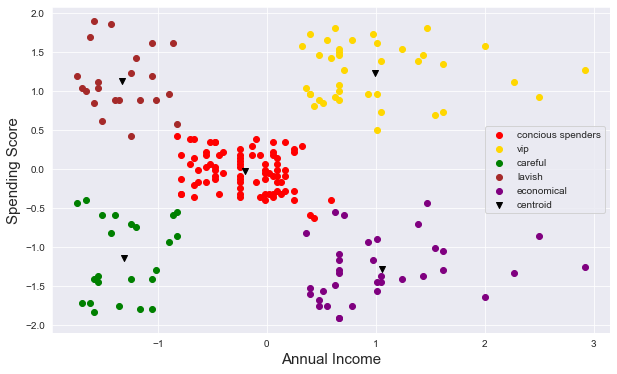

In [34]:
mc1 = mc[mc.Clusters == 0]
mc2 = mc[mc.Clusters == 1]
mc3 = mc[mc.Clusters == 2]
mc4 = mc[mc.Clusters == 3]
mc5 = mc[mc.Clusters == 4]
plt.scatter(mc1['Annual Income (k$)'], mc1['Spending Score (1-100)'], 
            color = 'red',
            label = 'concious spenders')
plt.scatter(mc2['Annual Income (k$)'], mc2['Spending Score (1-100)'], 
            color = 'gold', 
            label = "vip")
plt.scatter(mc3['Annual Income (k$)'], mc3['Spending Score (1-100)'], 
            color = 'green', 
            label = 'careful')
plt.scatter(mc4['Annual Income (k$)'], mc4['Spending Score (1-100)'],
            color = 'brown',
            label = 'lavish')
plt.scatter(mc5['Annual Income (k$)'], mc5['Spending Score (1-100)'], color = 'purple',
            label = 'economical')
plt.scatter(KMean_clust.cluster_centers_[:,0],KMean_clust.cluster_centers_[:,1],color = 'black', marker = "v",
            label = "centroid")
plt.legend()
plt.xlabel('Annual Income', fontsize = 15)
plt.ylabel('Spending Score', fontsize = 15)
plt.show()

The clustering analysis above displays clearly the segments of mall customers. With their annual income and spending scores as the best attributes to divide them. The customers are split into 5 different segments, namely vip,concious spenders, lavish, economical and careful spenders.

# 6. Analysing Clusters

### Cluster 1
Customers in cluster 1 which is represented by the color red are more conserved and concious spenders. These customers spend within their income limits.

### Cluster 2
Customers in cluster 2 which is represented by the color gold make more and spend more. they are the VIPs.

### Cluster 3
Customers in cluster 3 which is represented by the color green are careful spenders. since they make very little, their spending habits are very minimal

### Cluster 4
Customers in cluster 4 which is represented by the color brown are lavish spenders. they make less but spend more. In other word, they are spendrifts.

### Cluster 5 
Customers in cluster 5 which is represented by the color purple are more economical. Eventhough they make more income they tend to spend less.